In [1]:
#Objectives of the Study
#Given a healthcare dataset and understanding the features, the following objectives are taken for this study :
#Prediction of Length of Hospitalisation for different patients being admitted to hospitals.
#Prediction of respective Billing Amount of medication.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('healthcare_dataset.csv')

In [4]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328.0,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265.0,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205.0,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450.0,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458.0,Urgent,2022-10-09,Penicillin,Abnormal


In [10]:
data.describe()

,Age,Billing Amount,Room Number
count,6932.000000,6932.000000,6931.000000
mean,51.898009,25617.393527,299.347280
std,19.766480,14165.407943,115.485346
min,18.000000,-1310.272895,101.000000
25%,35.000000,13350.827324,201.000000
50%,52.000000,25724.602718,302.000000
75%,69.000000,37739.926830,396.000000
max,85.000000,52271.663747,500.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6932 entries, 0 to 6931
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                6932 non-null   object 
 1   Age                 6932 non-null   int64  
 2   Gender              6932 non-null   object 
 3   Blood Type          6932 non-null   object 
 4   Medical Condition   6932 non-null   object 
 5   Date of Admission   6932 non-null   object 
 6   Doctor              6932 non-null   object 
 7   Hospital            6932 non-null   object 
 8   Insurance Provider  6932 non-null   object 
 9   Billing Amount      6932 non-null   float64
 10  Room Number         6931 non-null   float64
 11  Admission Type      6931 non-null   object 
 12  Discharge Date      6931 non-null   object 
 13  Medication          6931 non-null   object 
 14  Test Results        6931 non-null   object 
dtypes: float64(2), int64(1), object(12)
memory usage: 812.5

In [7]:
data.shape

(6932, 15)

In [8]:
data.nunique()

Name                  6932
Age                     68
Gender                   2
Blood Type               8
Medical Condition        6
Date of Admission     1790
Doctor                6632
Hospital              6465
Insurance Provider       5
Billing Amount        6932
Room Number            400
Admission Type           3
Discharge Date        1797
Medication               5
Test Results             3
dtype: int64

In [9]:
data.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [11]:
data.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           1
Admission Type        1
Discharge Date        1
Medication            1
Test Results          1
dtype: int64

In [13]:
data['Room Number'] = data['Room Number'].fillna(0)
data['Admission Type'] = data['Admission Type'].fillna(0)
data['Discharge Date'] = data['Discharge Date'].fillna(0)
data['Medication'] = data['Medication'].fillna(0)
data['Test Results'] = data['Test Results'].fillna(0)

In [14]:
data.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [17]:
data.tail()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
6927,jaCOB gaTeS,68,Female,O+,Arthritis,2021-11-21,Tamara Mendoza,Newman Ltd,UnitedHealthcare,1120.362056,340.0,Emergency,2021-12-01,Penicillin,Normal
6928,cLAyton RYAn,67,Male,B+,Obesity,2022-11-13,Amber Gonzalez,Brown Group,Cigna,27544.724642,459.0,Urgent,2022-11-22,Paracetamol,Inconclusive
6929,reGINA wEbb,51,Male,O+,Obesity,2023-01-17,Misty Nguyen,Thompson Group,Blue Cross,2757.368263,386.0,Urgent,2023-02-13,Penicillin,Normal
6930,aRThUR PortER,42,Male,AB-,Hypertension,2022-05-25,Diana Johnson,Ayers-Bowers,UnitedHealthcare,10487.865998,184.0,Elective,2022-06-02,Paracetamol,Normal
6931,dANiel bROokS,32,Female,A-,Cancer,2019-06-11,Christina Schmidt,Peterson-Hodges,UnitedHealthcare,29685.403044,0.0,0,0,0,0


In [38]:
# data.drop(1631,axis=0, inplace=True)


In [36]:
data=data.drop(6931)

In [18]:
data.notnull().sum()

Name                  6932
Age                   6932
Gender                6932
Blood Type            6932
Medical Condition     6932
Date of Admission     6932
Doctor                6932
Hospital              6932
Insurance Provider    6932
Billing Amount        6932
Room Number           6932
Admission Type        6932
Discharge Date        6932
Medication            6932
Test Results          6932
dtype: int64

In [19]:
data[data.duplicated()]

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results


D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


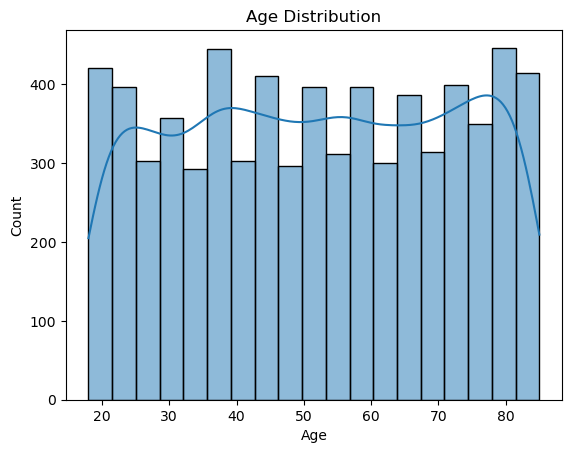

In [20]:

sns.histplot(data=data,x='Age',kde=True)
plt.title('Age Distribution')
plt.show()

In [21]:
data.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [22]:
data.describe(include='object')

,Name,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
count,6932,6932,6932,6932,6932,6932,6932,6932,6932,6932,6932,6932
unique,6932,2,8,6,1790,6632,6465,5,4,1798,6,4
top,Bobby JacksOn,Male,A+,Asthma,2020-08-23,Matthew Smith,Johnson PLC,Cigna,Elective,2021-01-27,Penicillin,Abnormal
freq,1,3467,886,1161,11,5,9,1408,2356,13,1430,2366


In [ ]:
#  Outlier Detection

In [25]:
#Inter-Quartile Method for Outlier Detection
numeric_data = data.select_dtypes(include=['number'])

Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)
data = data[~outliers]
print(data.shape)

(6932, 15)


In [26]:
#Z-score Method for Outlier Detection
mean = numeric_data.mean()
std = numeric_data.std()
z_scores = (numeric_data - mean) / std
outliers = (z_scores > 3) | (z_scores < -3)
data = data[~outliers.any(axis=1)]
print(data.shape)

(6932, 15)


In [ ]:
# We identified that data doesn't show any outliers

In [39]:
#Creating a separate column for length of hospitalisation
data['Length of Hospitalisation'] = (
    pd.to_datetime(data['Discharge Date']) - pd.to_datetime(data['Date of Admission'])
).dt.days

In [40]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Hospitalisation
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328.0,Urgent,2024-02-02,Paracetamol,Normal,2
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265.0,Emergency,2019-08-26,Ibuprofen,Inconclusive,6
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205.0,Emergency,2022-10-07,Aspirin,Normal,15
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450.0,Elective,2020-12-18,Ibuprofen,Abnormal,30
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458.0,Urgent,2022-10-09,Penicillin,Abnormal,20


In [ ]:
import numpy as np

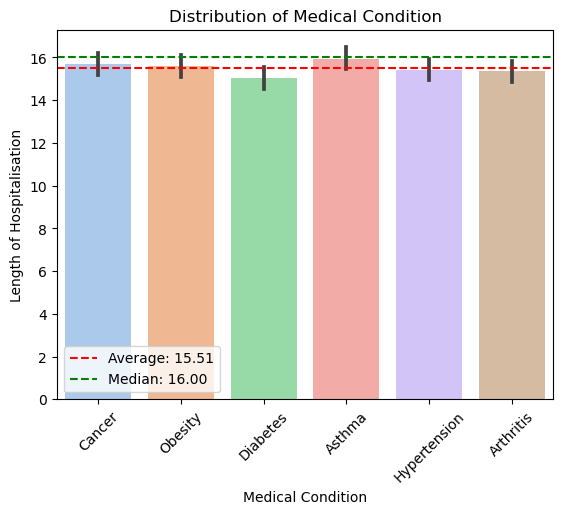

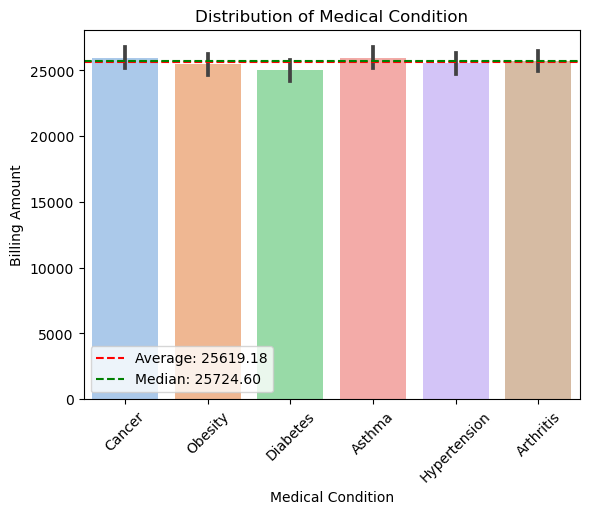

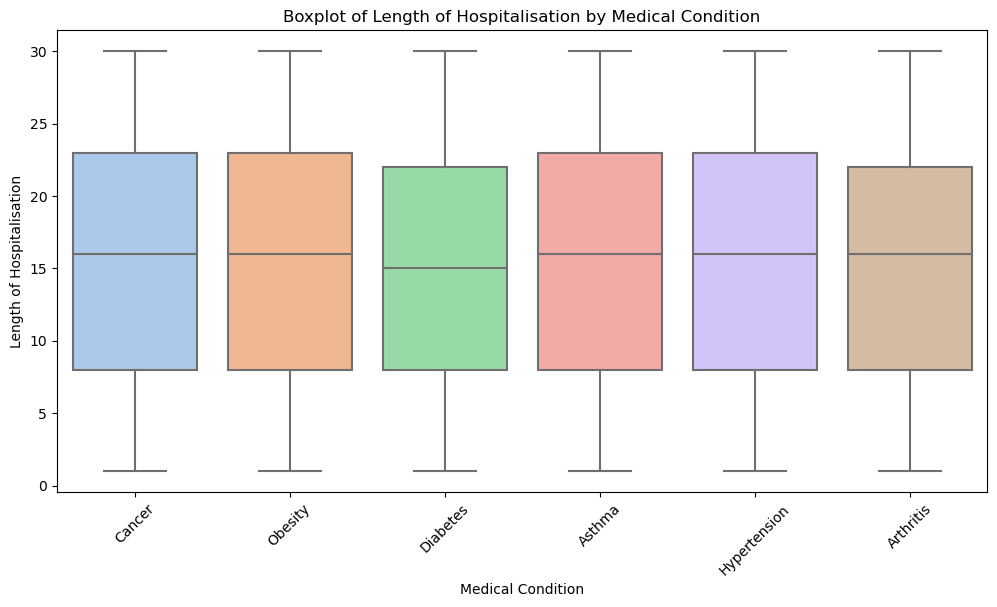

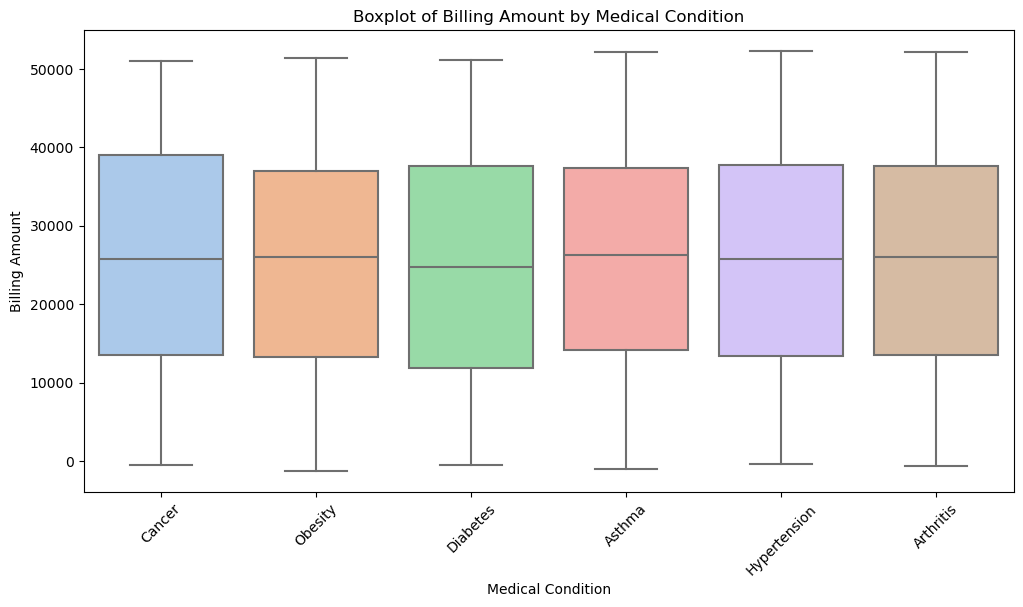

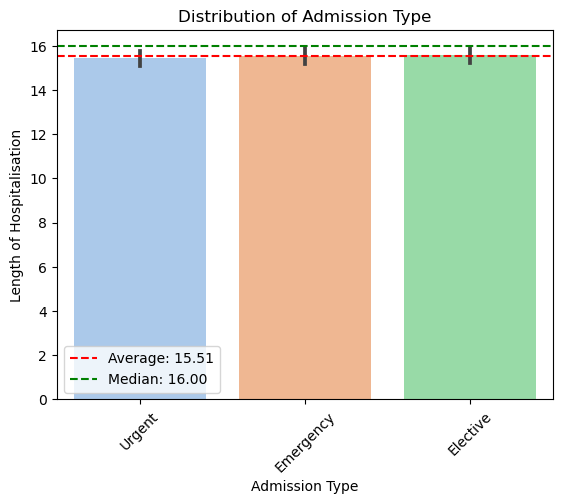

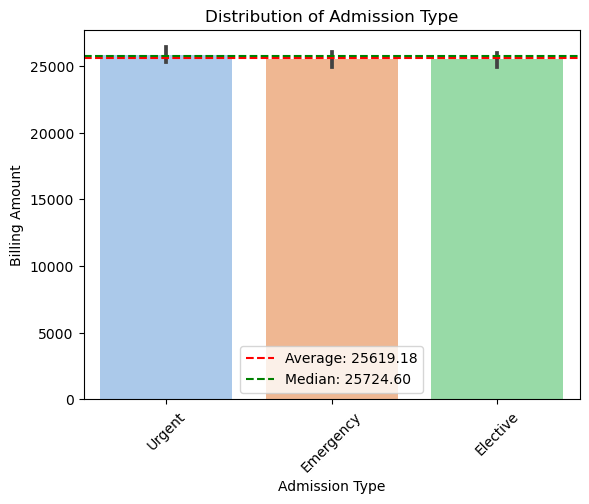

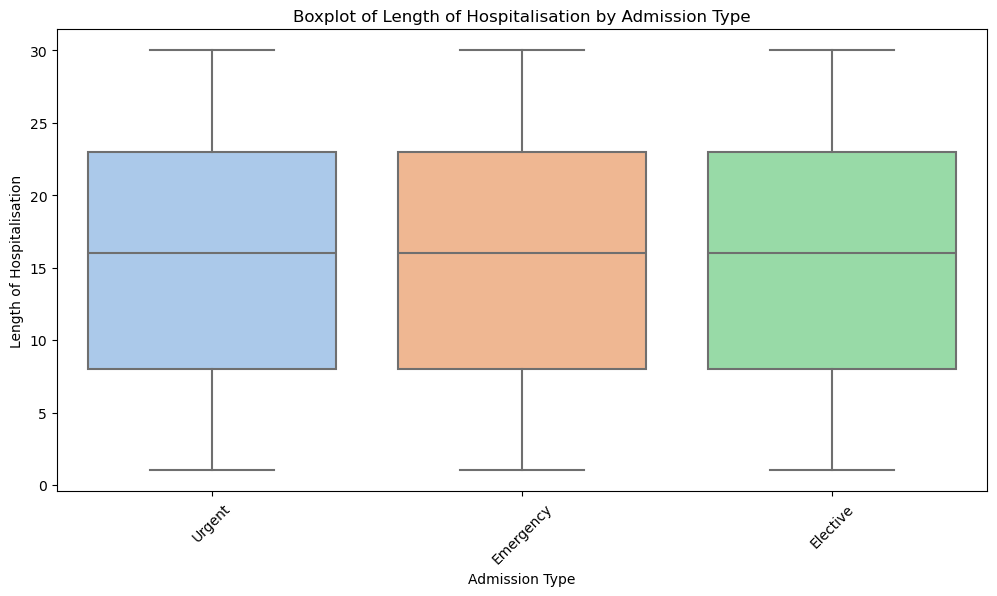

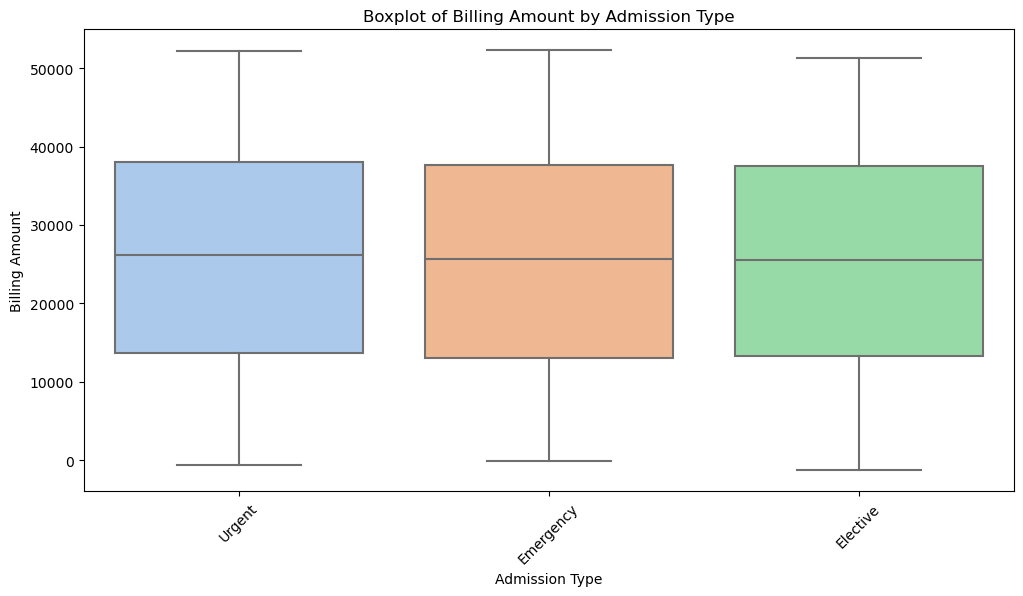

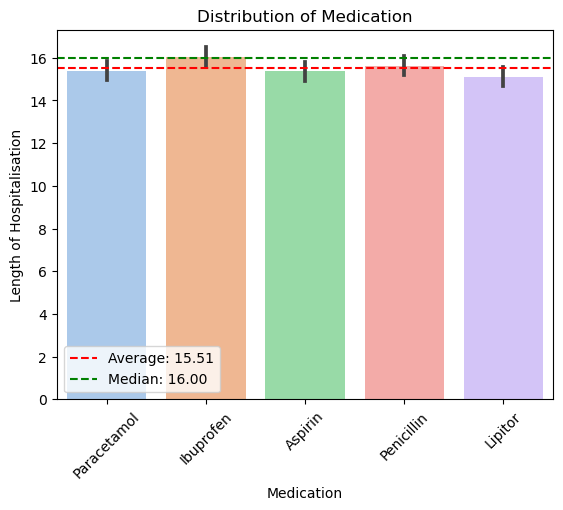

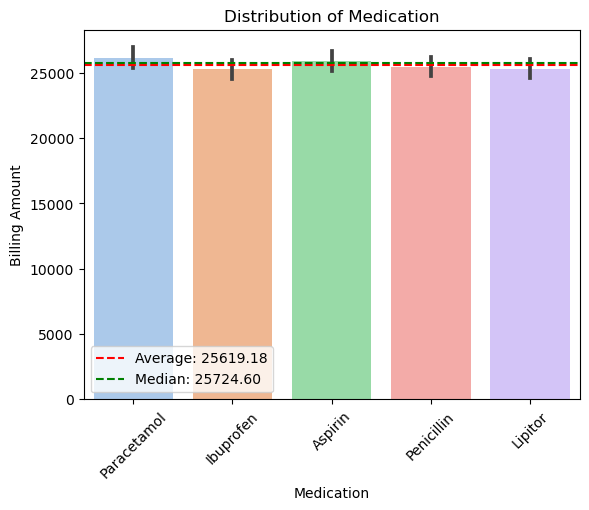

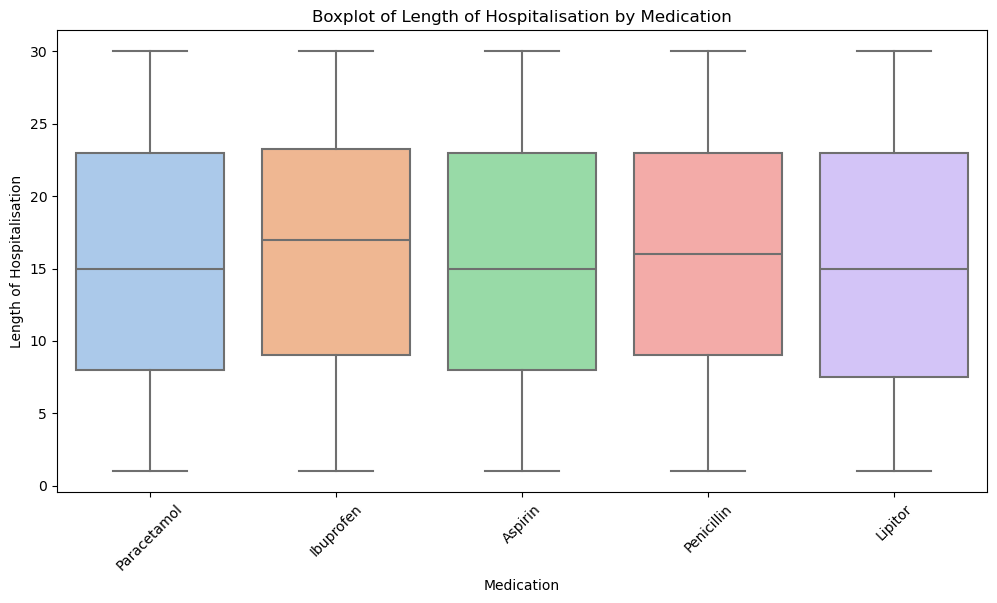

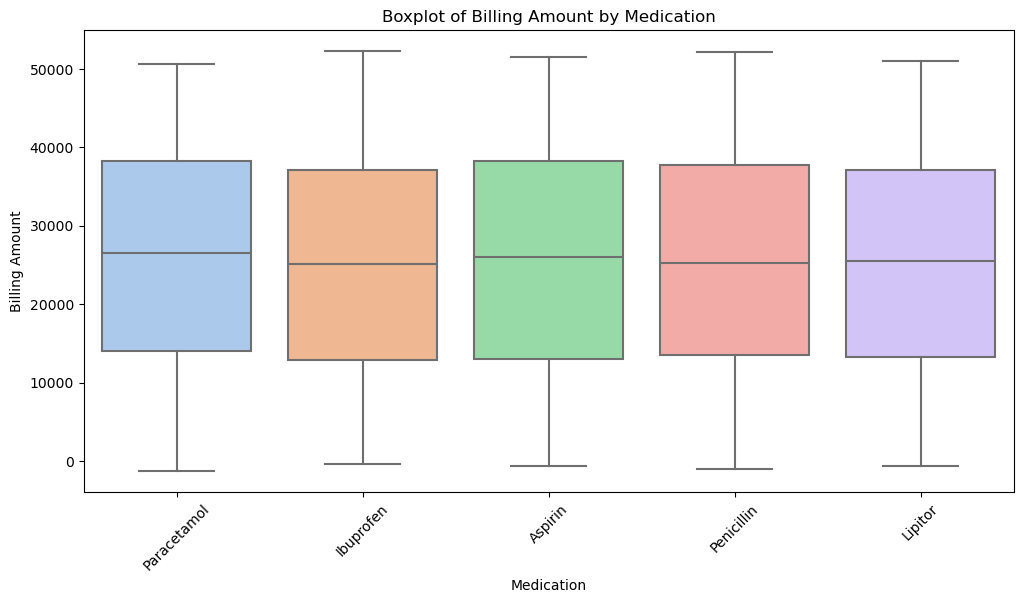

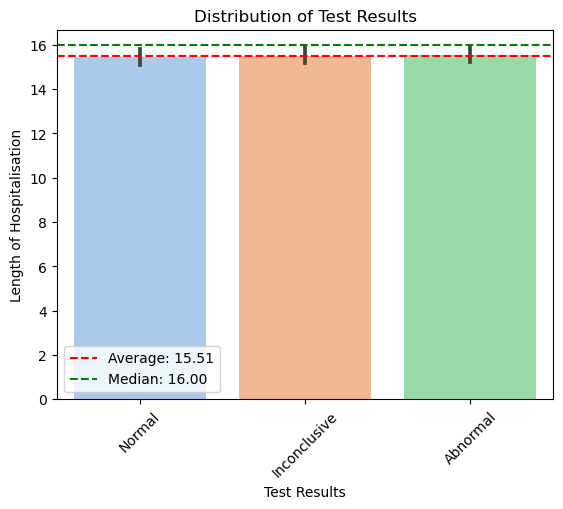

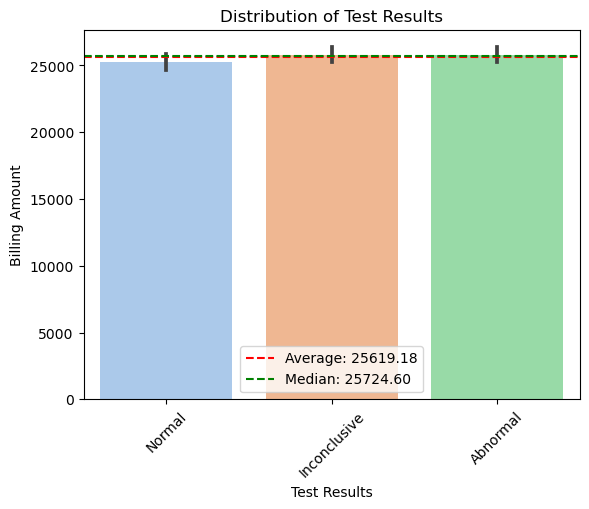

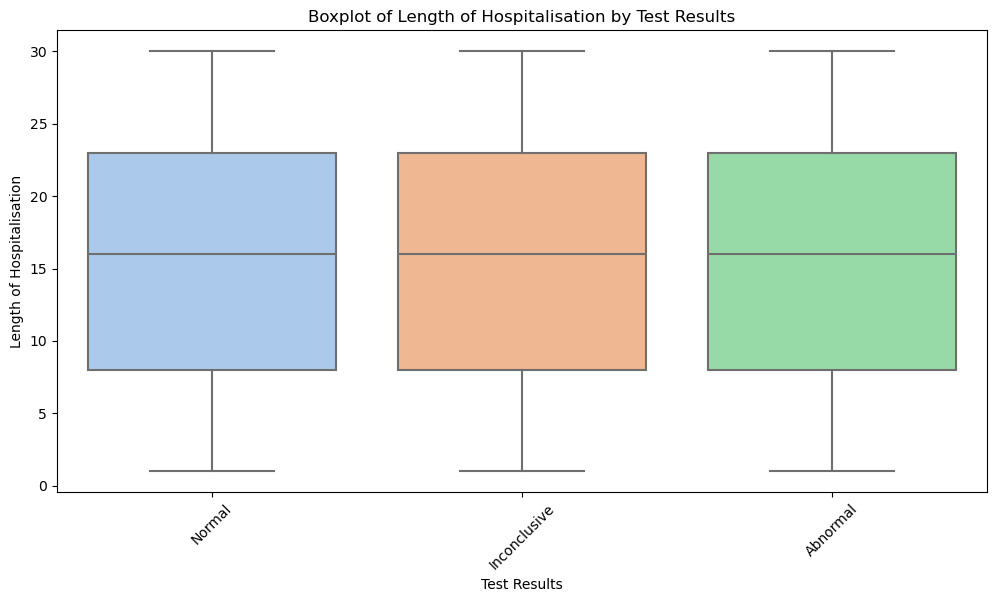

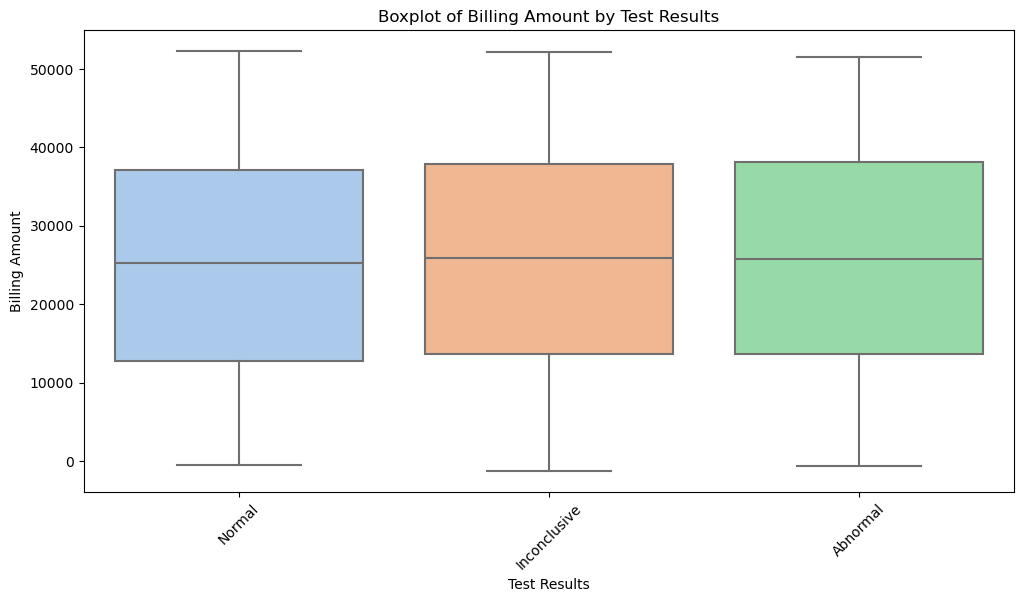

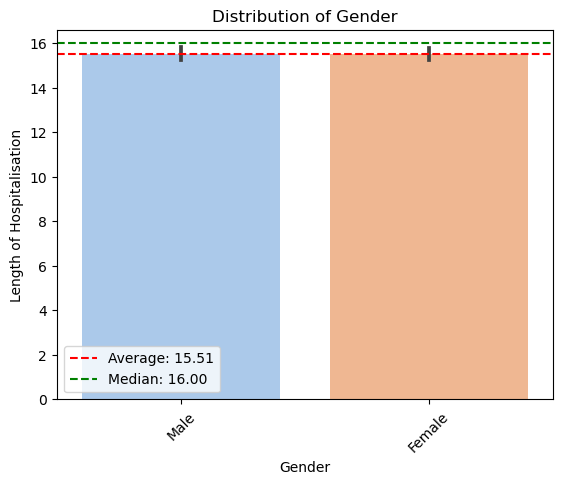

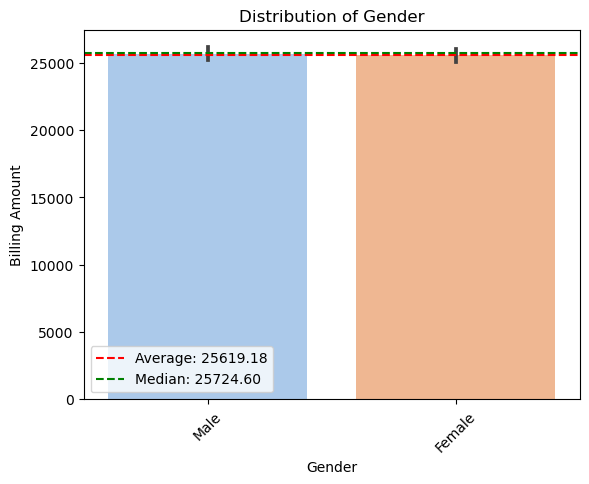

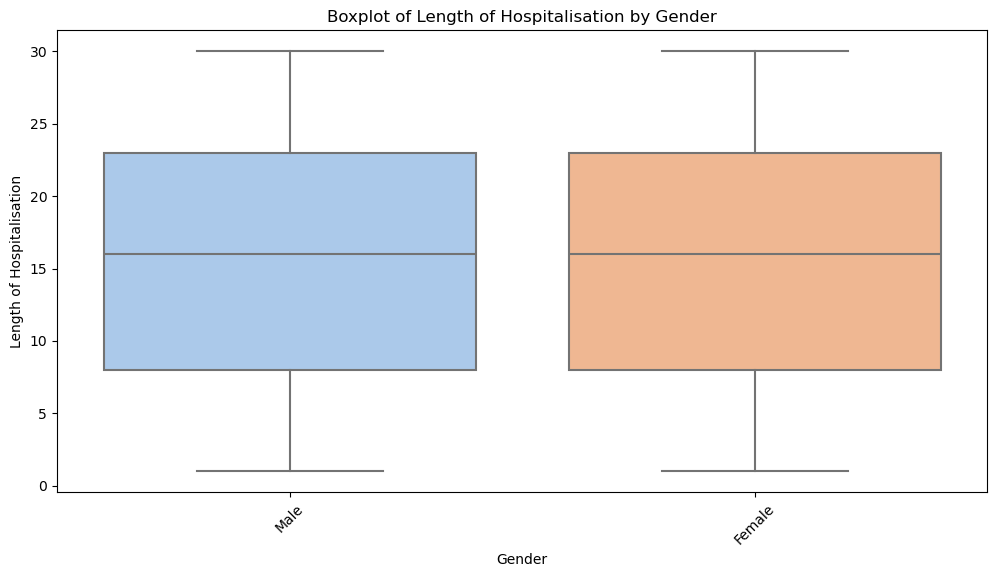

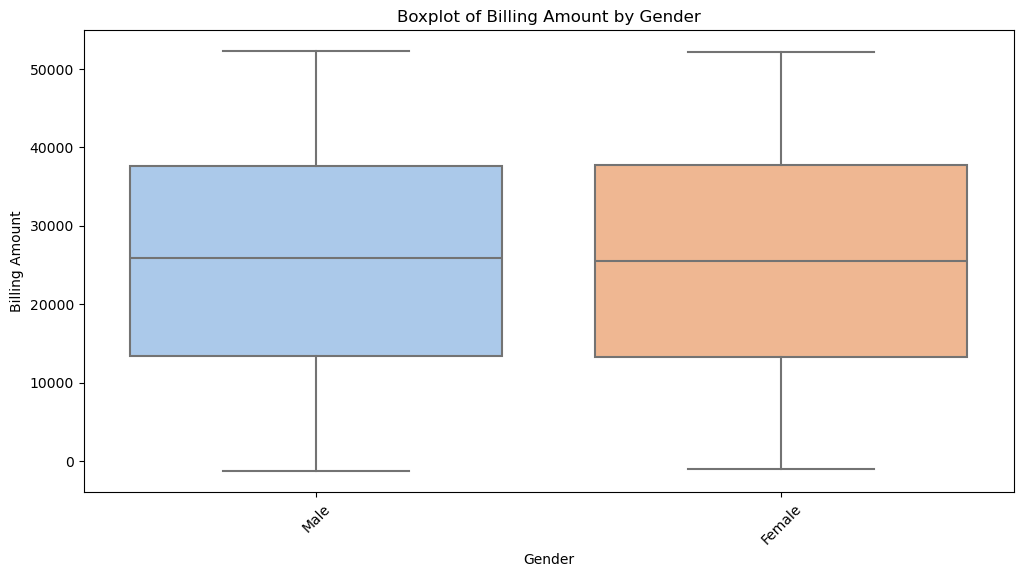

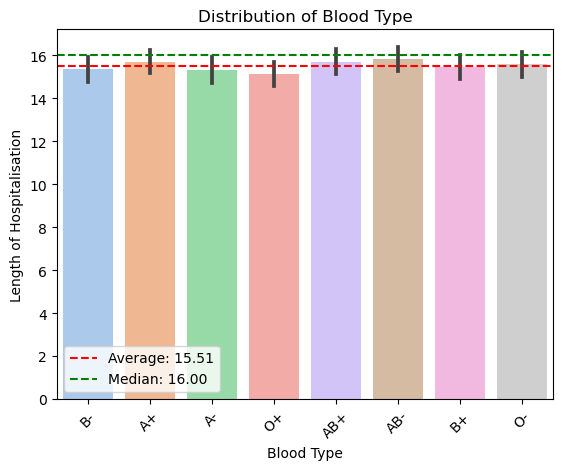

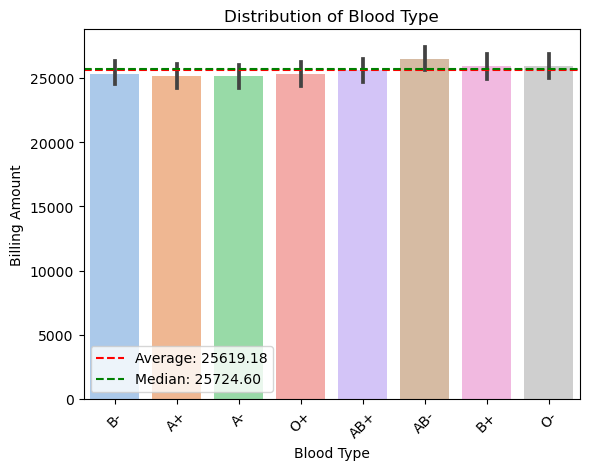

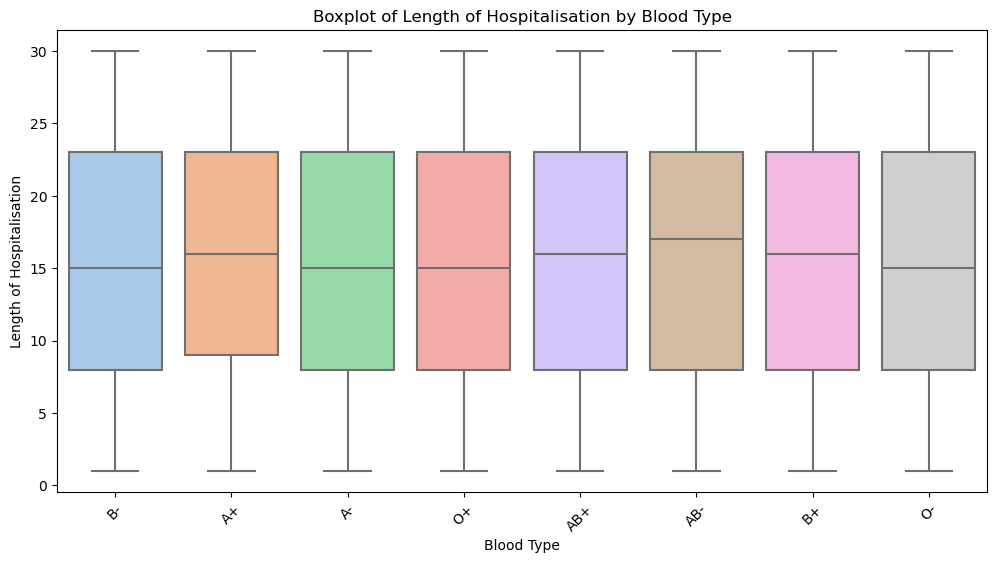

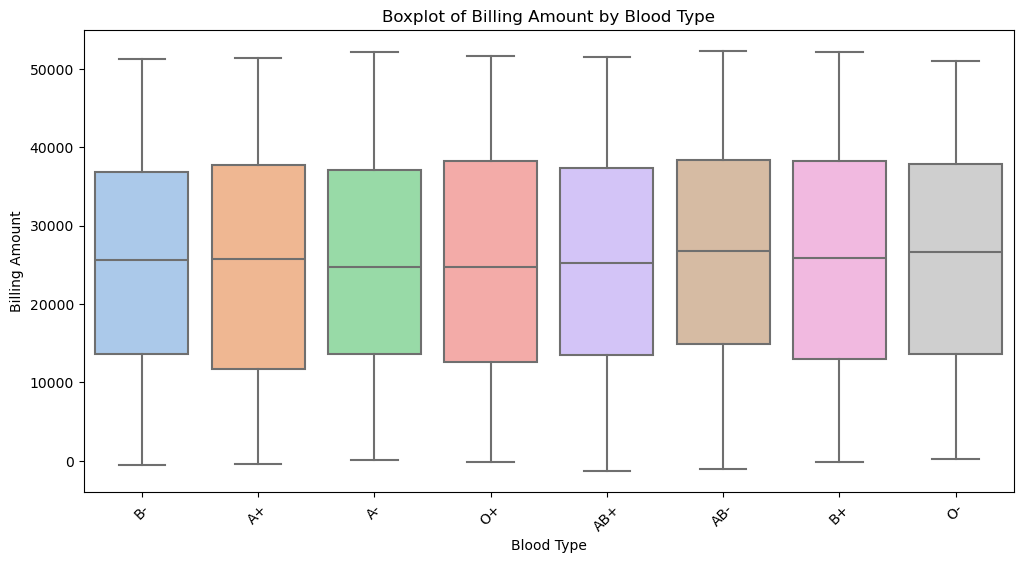

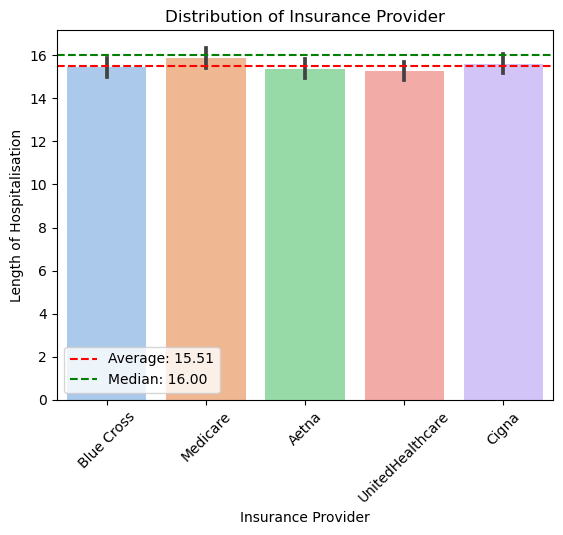

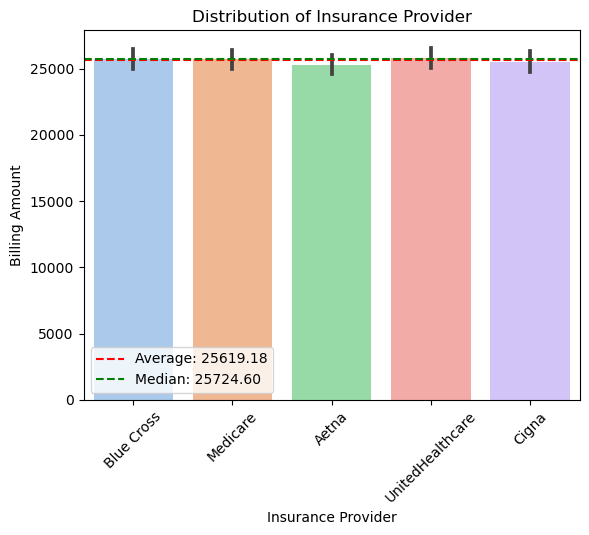

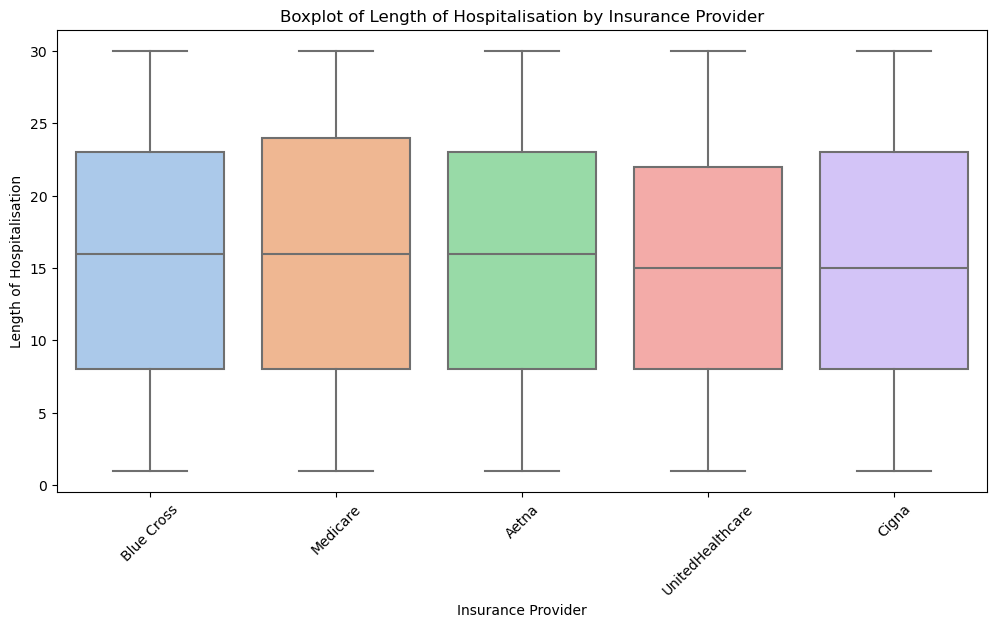

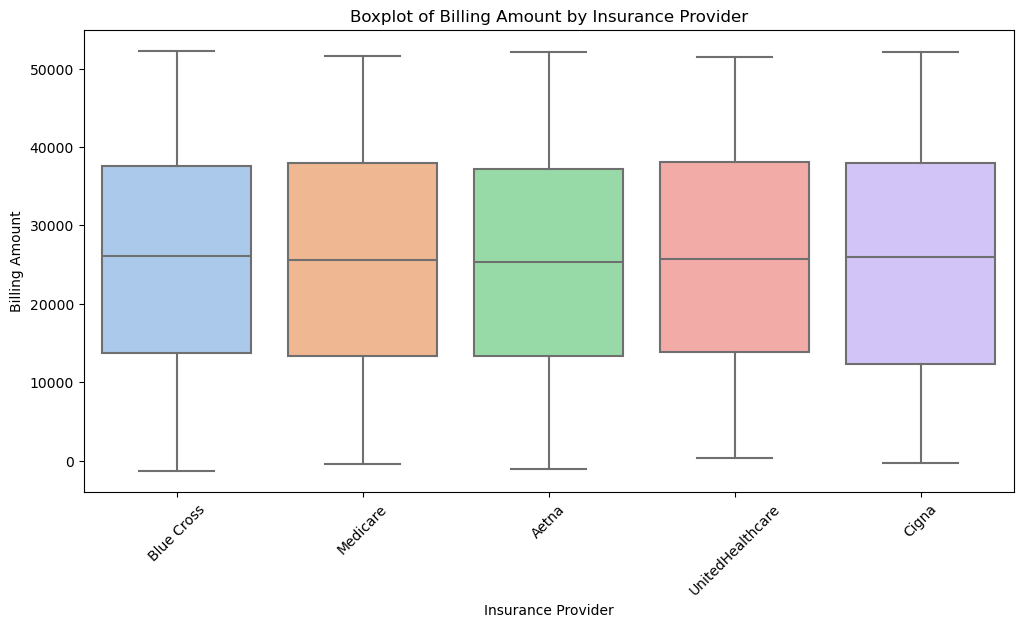

In [50]:
# Finding Basic Statistics
columns = ['Medical Condition', 'Admission Type', 'Medication', 'Test Results','Gender','Blood Type','Insurance Provider']
# We already converted Age to Label using binning so we may not use it
for col in columns:
  average_value = np.mean(data['Length of Hospitalisation'])
  median_value = np.median(data['Length of Hospitalisation'])
  sns.barplot(x=col,y='Length of Hospitalisation', data=data, palette='pastel')
  plt.title(f'Distribution of {col}')
  plt.axhline(y=average_value, color='red', linestyle='--', label=f'Average: {average_value:.2f}')
  plt.axhline(y=median_value, color='green', linestyle='--', label=f'Median: {median_value:.2f}')
  plt.legend()
  plt.xticks(rotation=45)
  plt.show()
  average_value1 = np.mean(data['Billing Amount'])
  median_value1 = np.median(data['Billing Amount'])
  sns.barplot(x=col,y='Billing Amount', data=data, palette='pastel')
  plt.title(f'Distribution of {col}')
  plt.axhline(y=average_value1, color='red', linestyle='--', label=f'Average: {average_value1:.2f}')
  plt.axhline(y=median_value1, color='green', linestyle='--', label=f'Median: {median_value1:.2f}')
  plt.legend()
  plt.xticks(rotation=45)
  plt.show()
  plt.figure(figsize=(12, 6))
  sns.boxplot(x=col, y='Length of Hospitalisation', data=data, palette='pastel')
  plt.title(f'Boxplot of Length of Hospitalisation by {col}')
  plt.xticks(rotation=45)
  plt.show()
  plt.figure(figsize=(12, 6))
  sns.boxplot(x=col, y='Billing Amount', data=data, palette='pastel')
  plt.title(f'Boxplot of Billing Amount by {col}')
  plt.xticks(rotation=45)
  plt.show()

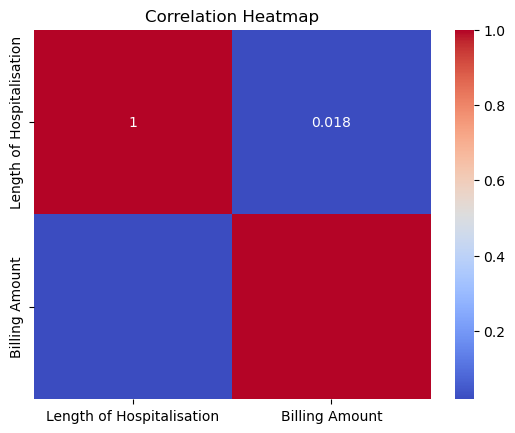

In [51]:
#Correlation heatmap between billing amount and length of hospitalisation

plt.figure()
sns.heatmap(data[['Length of Hospitalisation','Billing Amount']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [52]:
from sklearn.preprocessing import LabelEncoder

cat_columns=data.select_dtypes(include='object').columns
for i in range(len(cat_columns)):
  le=LabelEncoder()
  data[cat_columns[i]]=le.fit_transform(data[cat_columns[i]])

data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Hospitalisation
0,402,30,1,5,2,1694,4399,4955,1,18856.281306,328.0,2,1682,3,2,2
1,2085,62,1,0,5,101,5555,2616,3,33643.327287,265.0,1,102,1,1,6
2,872,76,0,1,5,1210,6201,854,0,27955.096079,205.0,1,1212,0,2,15
3,3709,28,0,6,3,550,3741,1964,3,37909.782410,450.0,0,576,1,0,30
4,3616,43,0,2,2,1207,3532,5526,0,14238.317814,458.0,2,1214,4,0,20


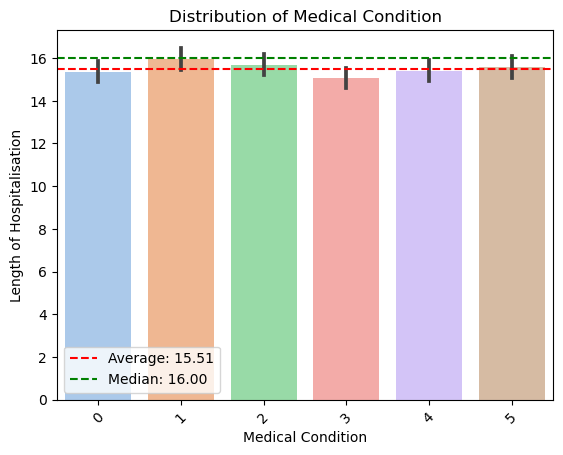

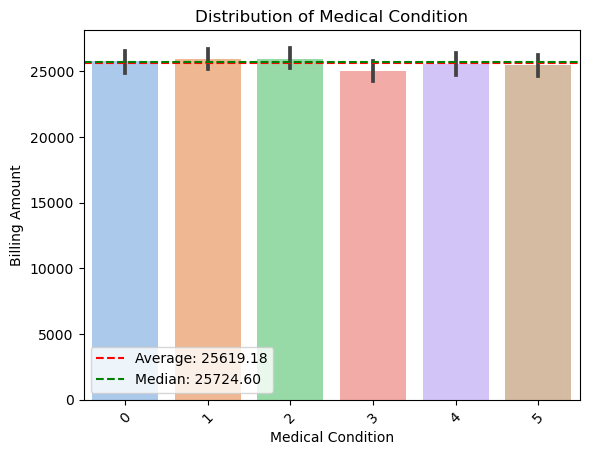

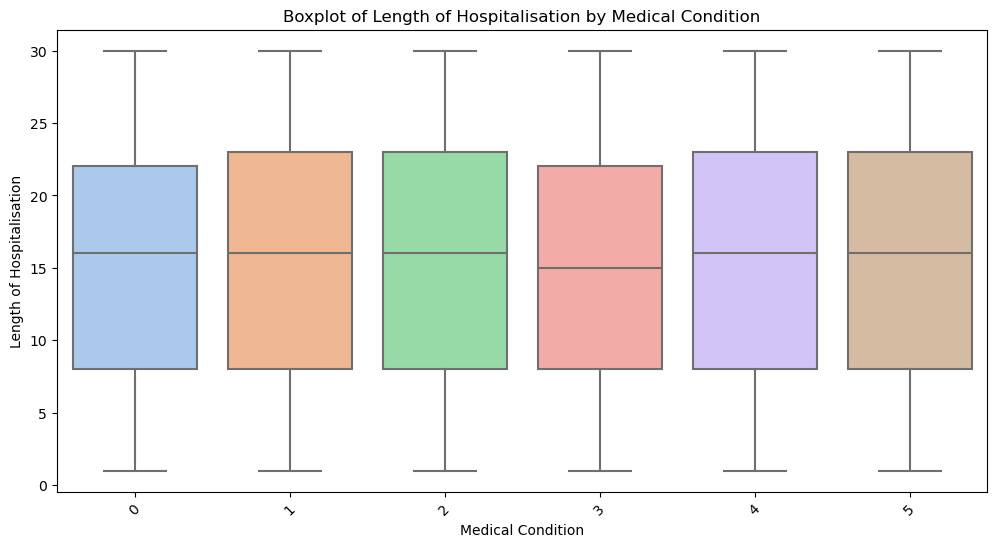

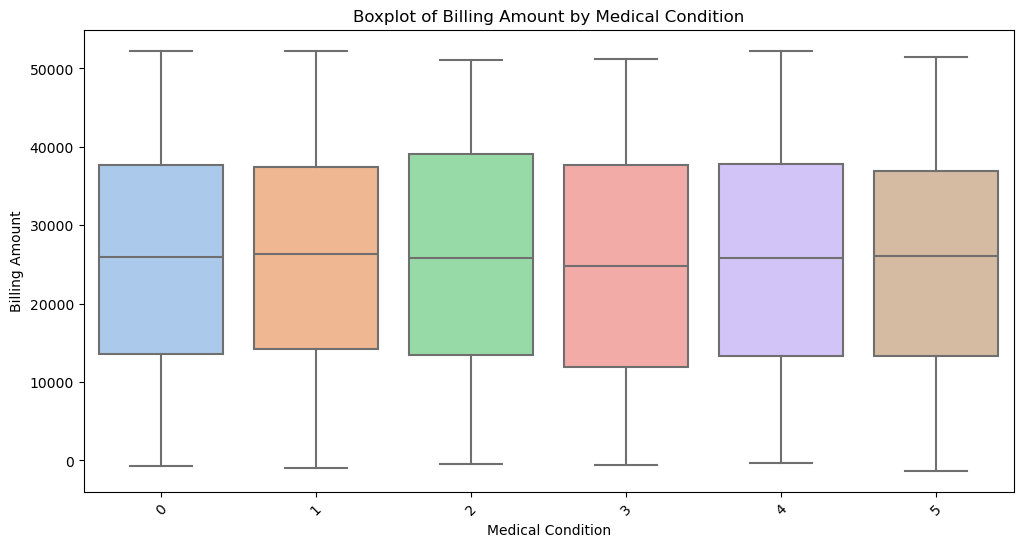

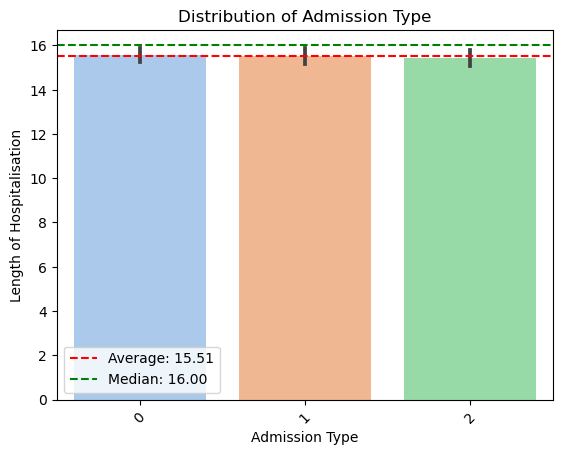

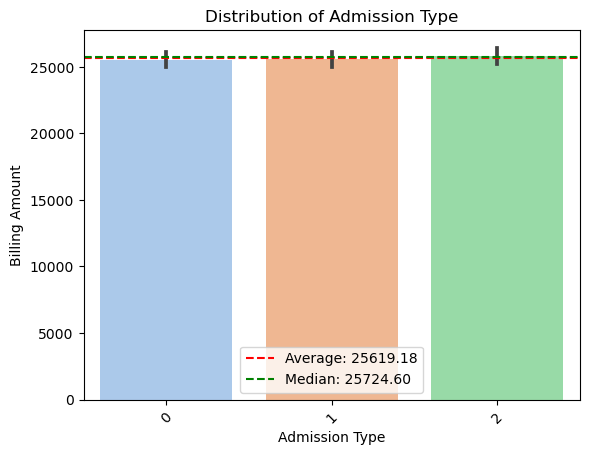

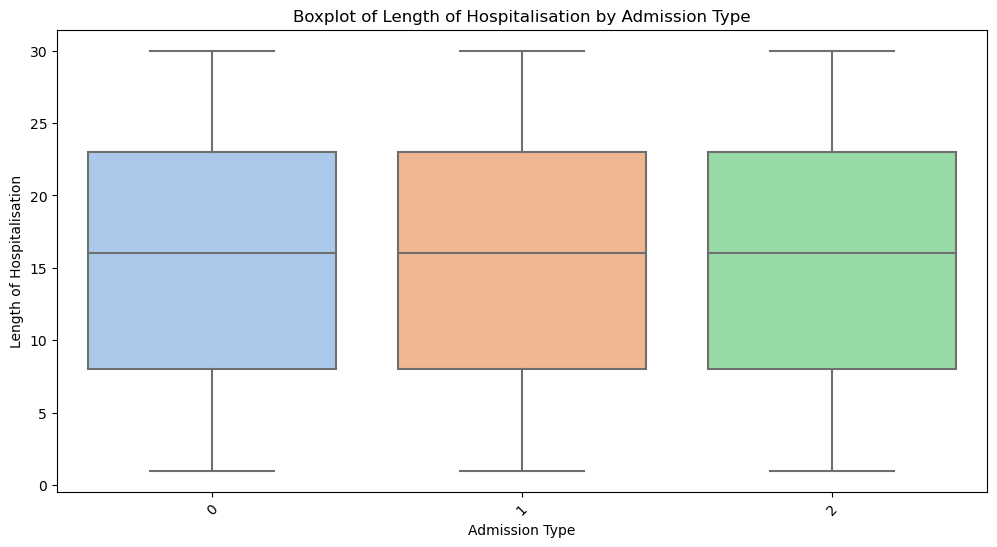

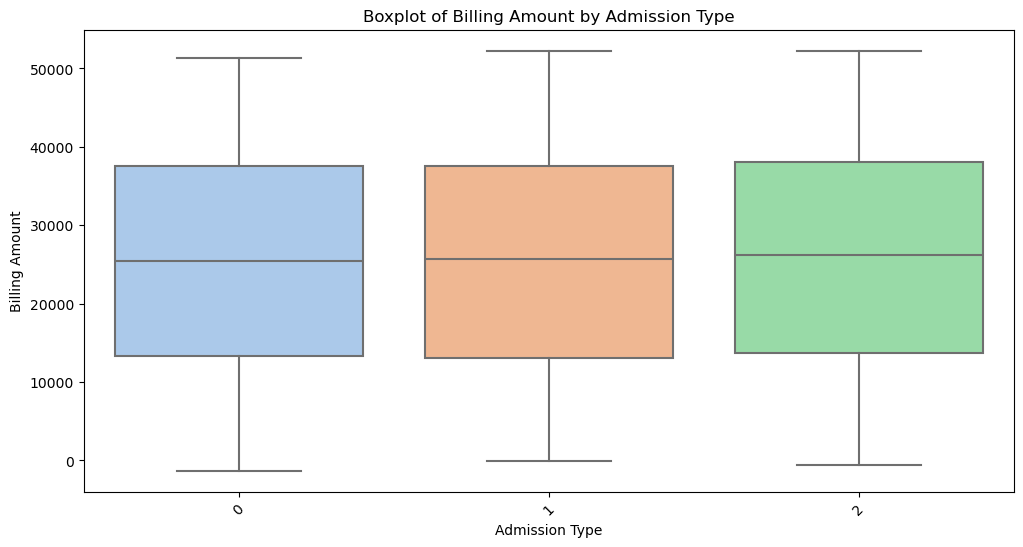

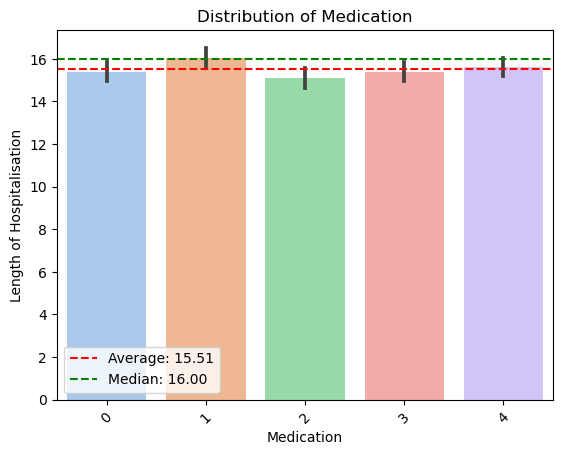

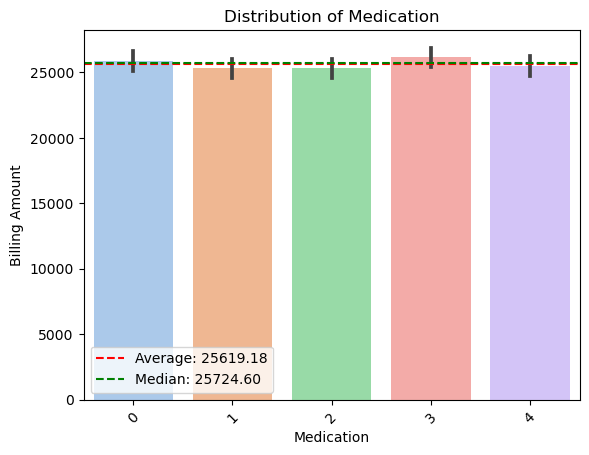

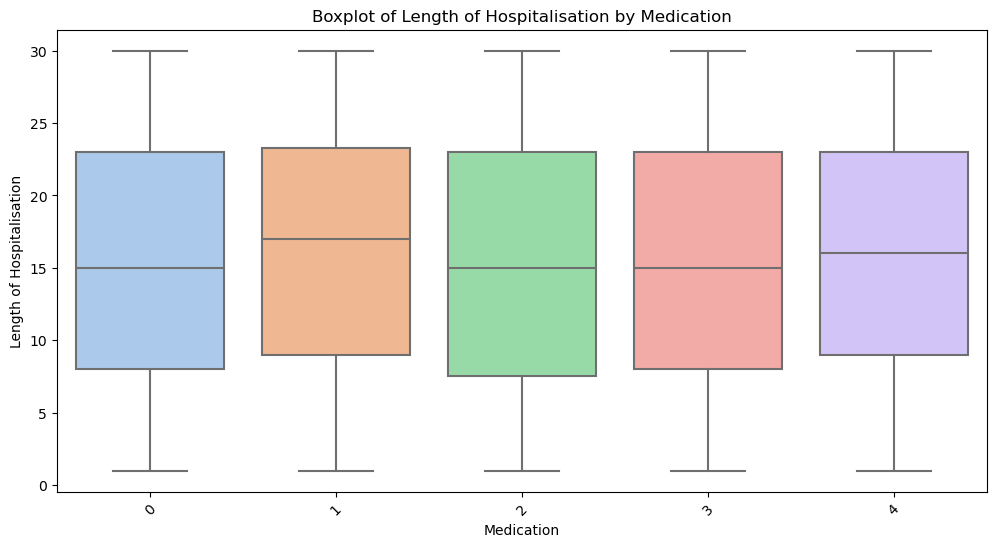

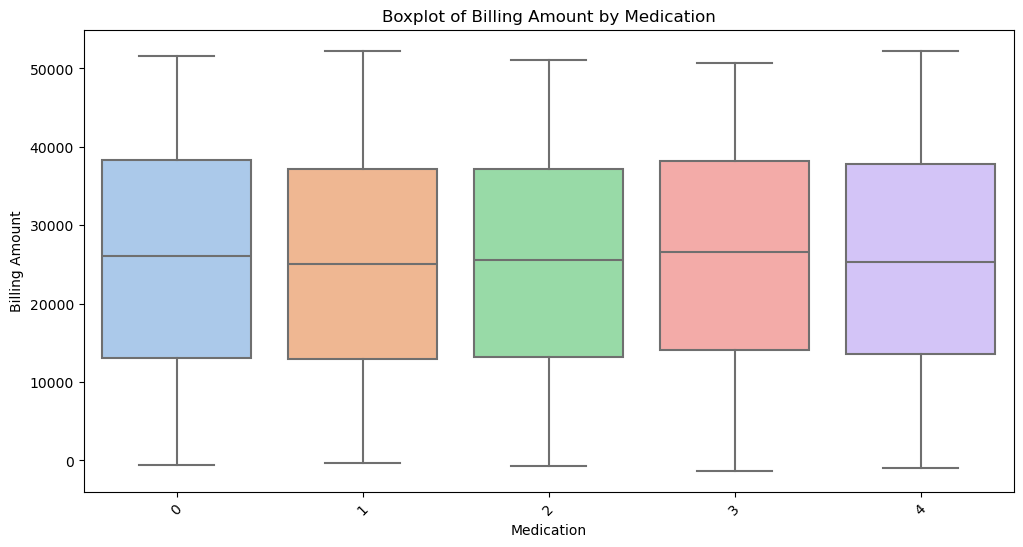

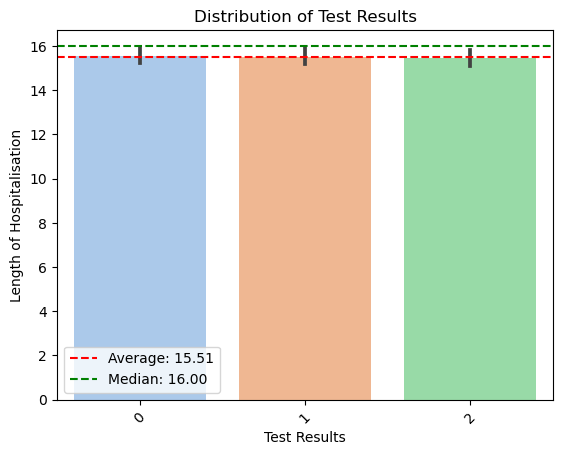

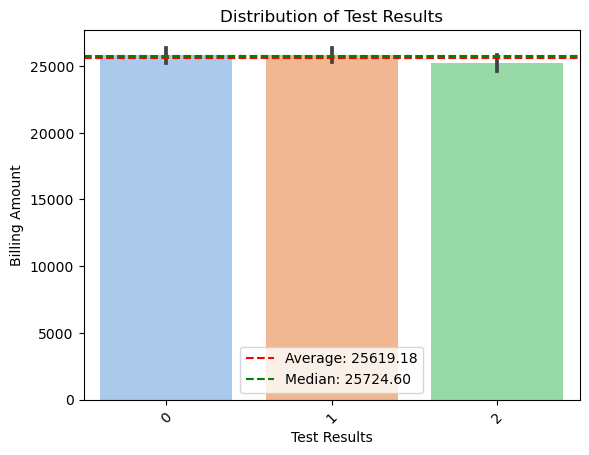

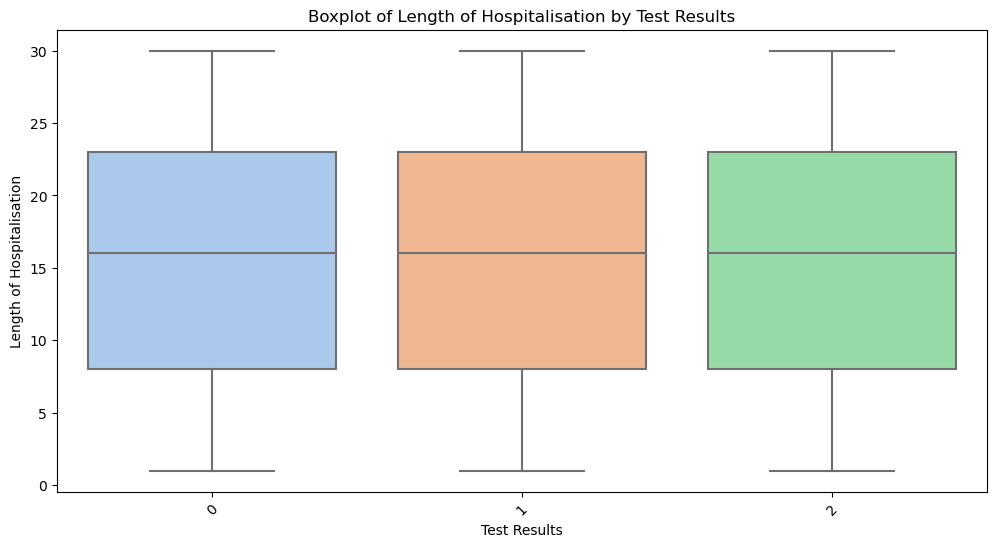

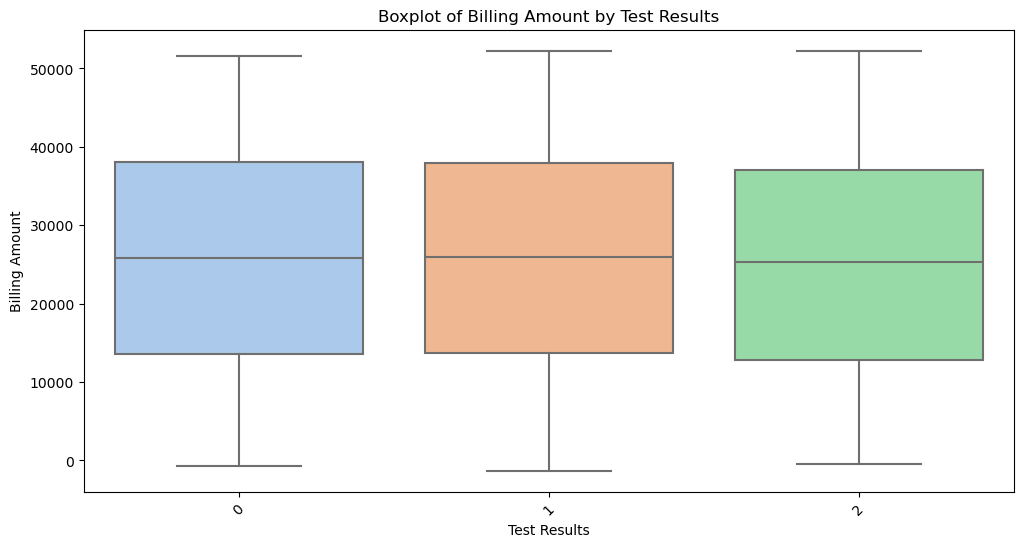

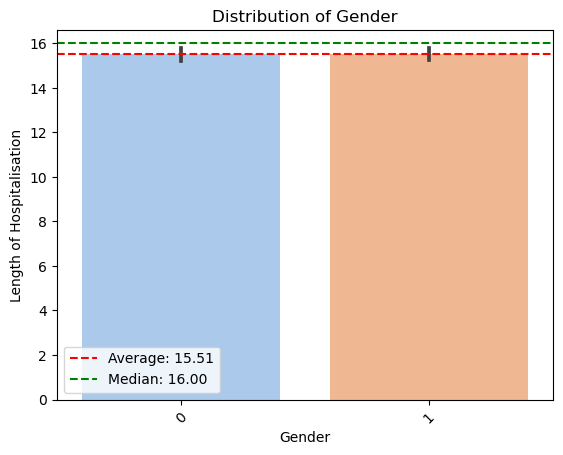

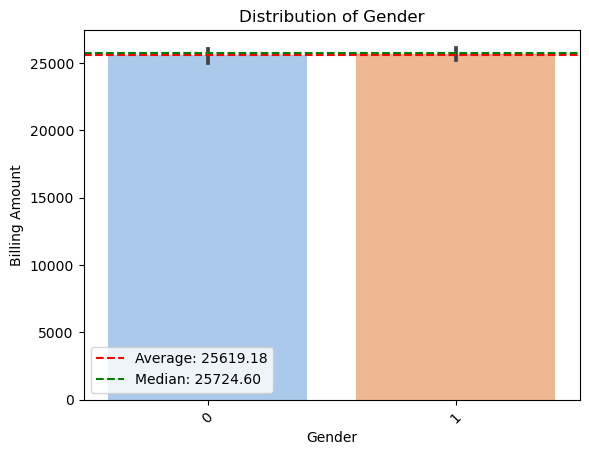

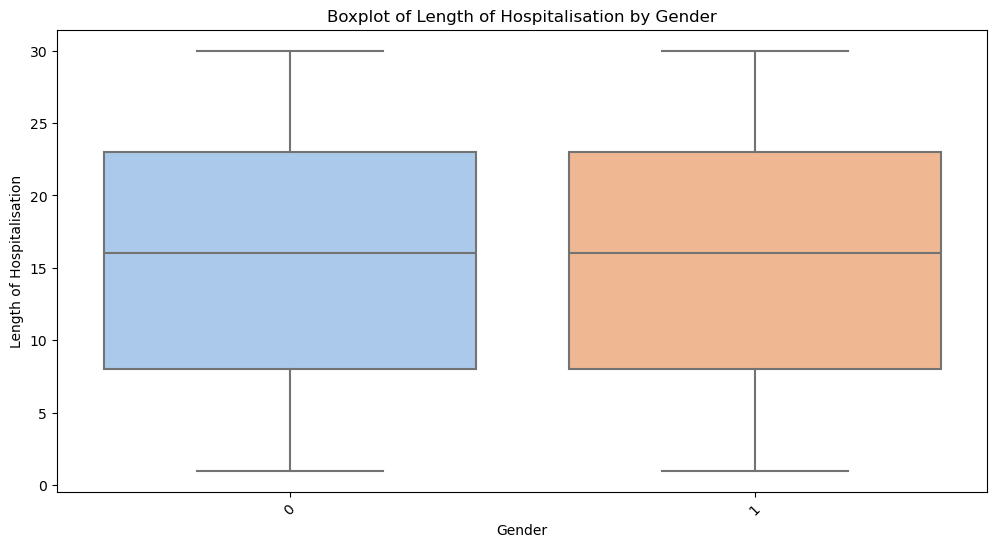

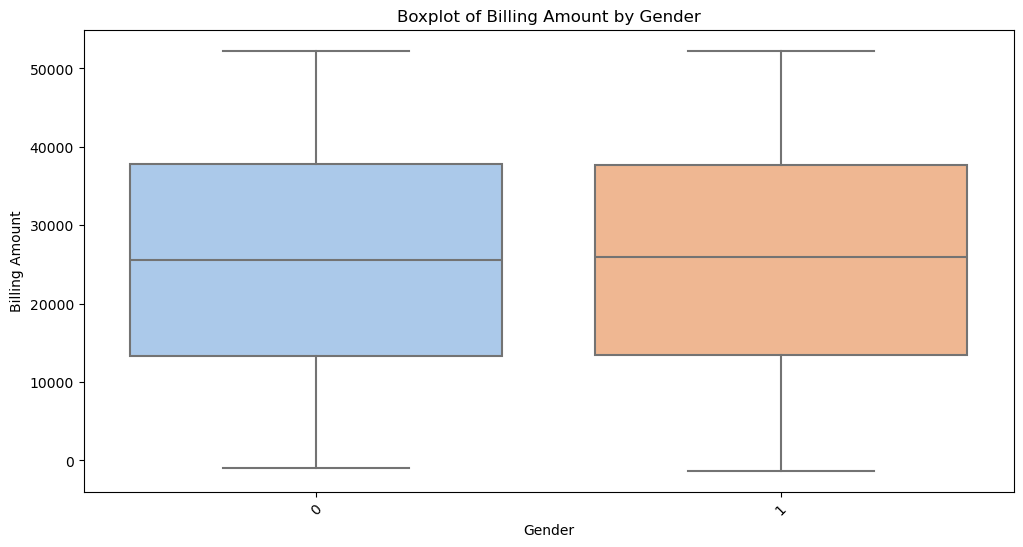

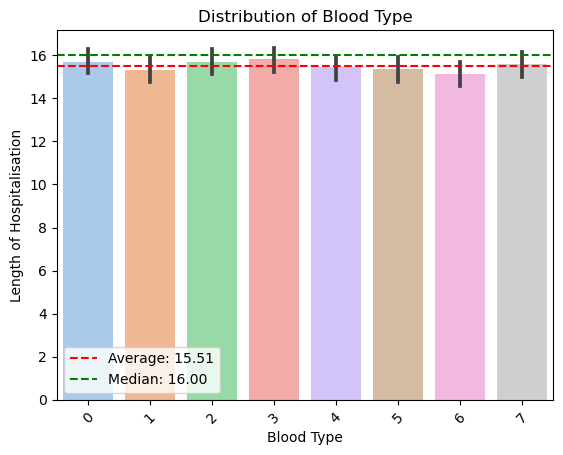

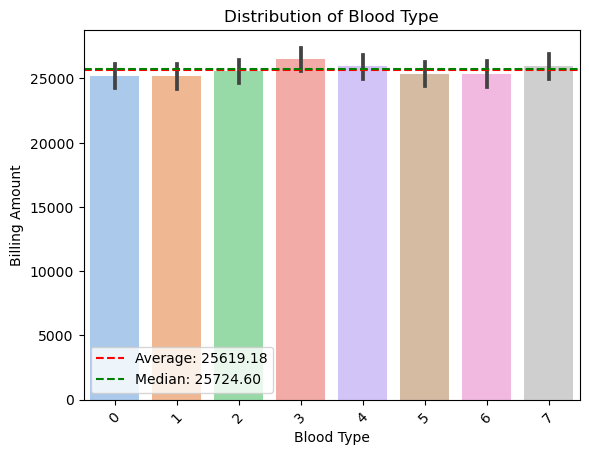

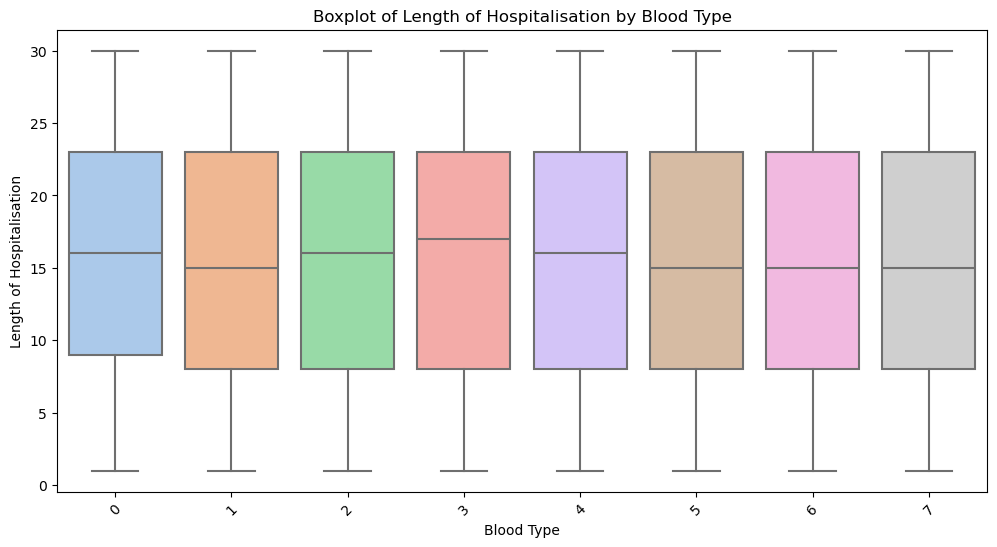

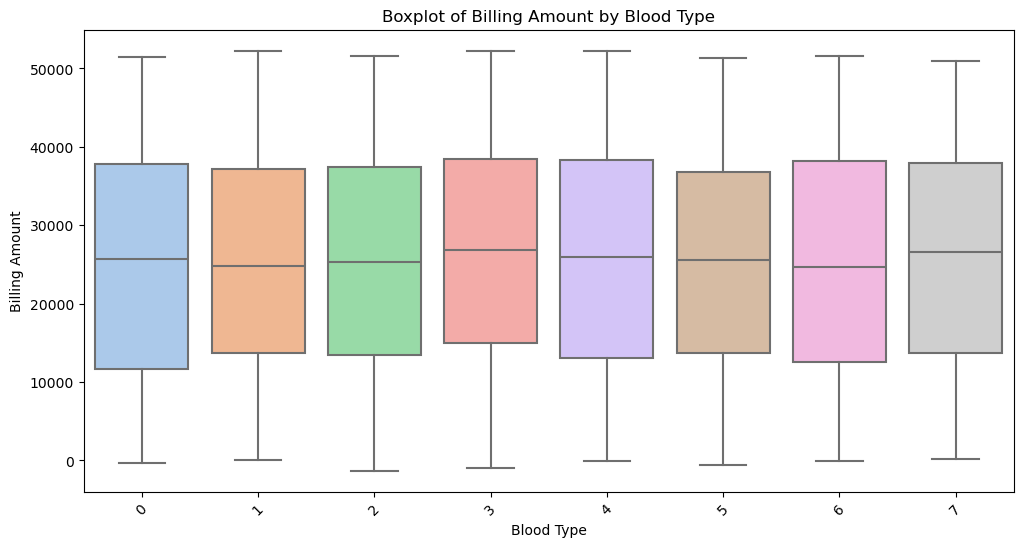

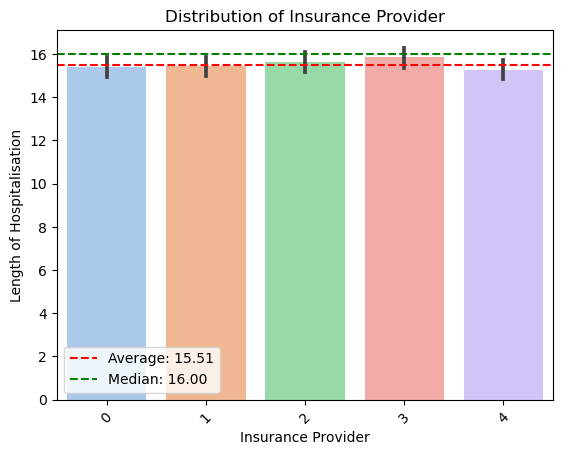

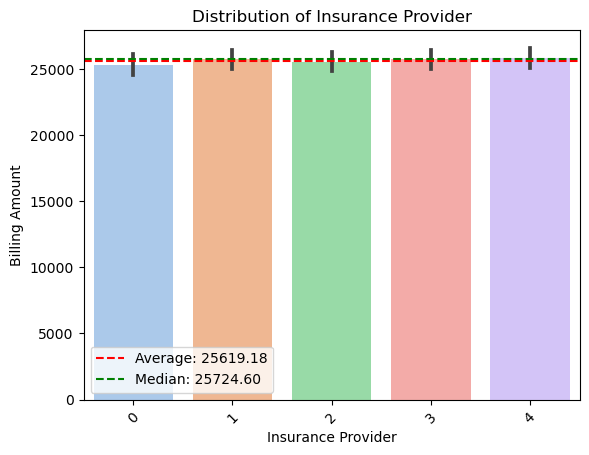

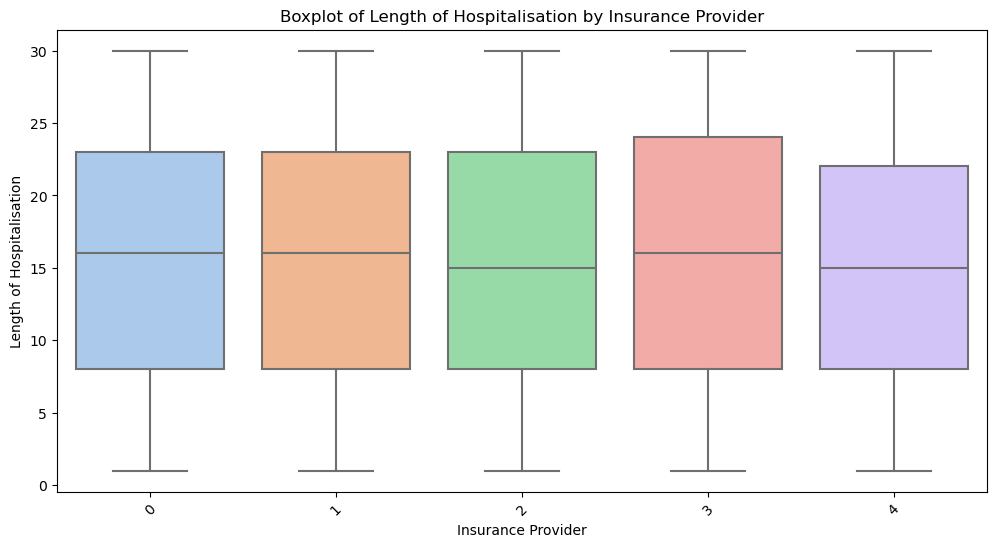

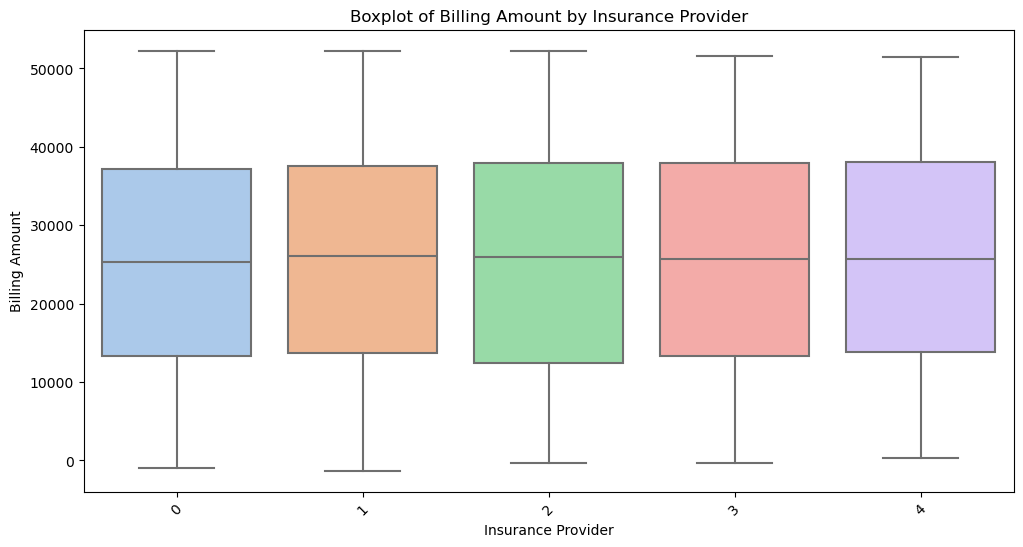

In [53]:
#Testing the Basic Statistical Analysis using encoded categorical columns

for col in columns:
  average_value = np.mean(data['Length of Hospitalisation'])
  median_value = np.median(data['Length of Hospitalisation'])
  sns.barplot(x=col,y='Length of Hospitalisation', data=data, palette='pastel')
  plt.title(f'Distribution of {col}')
  plt.axhline(y=average_value, color='red', linestyle='--', label=f'Average: {average_value:.2f}')
  plt.axhline(y=median_value, color='green', linestyle='--', label=f'Median: {median_value:.2f}')
  plt.legend()
  plt.xticks(rotation=45)
  plt.show()
  average_value1 = np.mean(data['Billing Amount'])
  median_value1 = np.median(data['Billing Amount'])
  sns.barplot(x=col,y='Billing Amount', data=data, palette='pastel')
  plt.title(f'Distribution of {col}')
  plt.axhline(y=average_value1, color='red', linestyle='--', label=f'Average: {average_value1:.2f}')
  plt.axhline(y=median_value1, color='green', linestyle='--', label=f'Median: {median_value1:.2f}')
  plt.legend()
  plt.xticks(rotation=45)
  plt.show()
  plt.figure(figsize=(12, 6))
  sns.boxplot(x=col, y='Length of Hospitalisation', data=data, palette='pastel')
  plt.title(f'Boxplot of Length of Hospitalisation by {col}')
  plt.xticks(rotation=45)
  plt.show()
  plt.figure(figsize=(12, 6))
  sns.boxplot(x=col, y='Billing Amount', data=data, palette='pastel')
  plt.title(f'Boxplot of Billing Amount by {col}')
  plt.xticks(rotation=45)
  plt.show()

In [54]:
#Using Prediction Models¶
#Now we shall use various prediction models and check their relative accuracies in predicting from the data

# Random Forest Regressor

In [56]:
#using random forest model for predicting length of hospitalisation and billing amount based on all the study variables
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


study_var=['Age','Gender','Blood Type','Medical Condition','Insurance Provider','Admission Type','Medication','Test Results']
target_var=['Length of Hospitalisation','Billing Amount']

for i in range(len(target_var)):
  X=data[study_var]
  y=data[target_var[i]]
  X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
  rf_model=RandomForestRegressor(n_estimators=100,random_state=42)
  rf_model.fit(X_train,y_train)
  y_pred=rf_model.predict(X_test)
  mse=mean_squared_error(y_test,y_pred)
  r2=r2_score(y_test,y_pred)
  print(f"Mean Squared Error for {target_var[i]}: {mse}")
  print(f"R-squared for {target_var[i]}: {r2}")

Mean Squared Error for Length of Hospitalisation: 80.80788693289429
R-squared for Length of Hospitalisation: -0.10370712920098657
Mean Squared Error for Billing Amount: 210543150.00869095
R-squared for Billing Amount: -0.06324968908327278


In [57]:
# Gradient Boosting Regression

In [58]:
#using gradient boosting regression for predicting length of hospitalisation and billing amount based on all the study variables
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


for i in range(len(target_var)):
  X=data[study_var]
  y=data[target_var[i]]
  X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
  gb_model=GradientBoostingRegressor(n_estimators=100,random_state=42)
  gb_model.fit(X_train,y_train)
  y_pred=gb_model.predict(X_test)
  mse=mean_squared_error(y_test,y_pred)
  r2=r2_score(y_test,y_pred)
  print(f"Mean Squared Error for {target_var[i]}: {mse}")
  print(f"R-squared for {target_var[i]}: {r2}")

Mean Squared Error for Length of Hospitalisation: 74.27999763509663
R-squared for Length of Hospitalisation: -0.01454655057334242
Mean Squared Error for Billing Amount: 199939722.57458064
R-squared for Billing Amount: -0.009702039007412067


In [59]:
# xgBoost

In [60]:
#using xgboost for predicting length of hospitalisation and billing amount based on all the study variables
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

for i in range(len(target_var)):
  X=data[study_var]
  y=data[target_var[i]]
  X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
  xgb_model=xgb.XGBRegressor(n_estimators=100,random_state=4)
  xgb_model.fit(X_train,y_train)
  y_pred=xgb_model.predict(X_test)
  mse=mean_squared_error(y_test,y_pred)
  r2=r2_score(y_test,y_pred)
  print(f"Mean Squared Error for {target_var[i]}: {mse}")
  print(f"R-squared for {target_var[i]}: {r2}")

Mean Squared Error for Length of Hospitalisation: 93.86654422769122
R-squared for Length of Hospitalisation: -0.28206760490589944
Mean Squared Error for Billing Amount: 244227940.20444134
R-squared for Billing Amount: -0.23335896455002847
